In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import copy
import pandas as pd

# --- Функції ---
def schwefel(x, y):
    return 837.9658 - (x * np.sin(np.sqrt(abs(x))) + y * np.sin(np.sqrt(abs(y))))

def drop_wave(x, y):
    numerator = 1 + np.cos(12 * np.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    return -numerator / denominator
# --- Глобальні змінні ---
min_schwefel = (420.9687, 420.9687, 0)
min_drop_wave = (0, 0, -1)
bounds_schwefel = [-500, 500]
bounds_drop_wave = [-5.12, 5.12]
temp = [0,0,0]
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def initialize_population(pop_size, bounds):
    population=[]
    for i in range(pop_size):
            temp[0] = random.uniform(bounds[0], bounds[1])
            temp[1] = random.uniform(bounds[0], bounds[1])
            population.append(copy.deepcopy(temp))
    return population

n_f = 0
def fitness(individual, func_name):
    global n_f
    n_f += 1
    if func_name == 'schwefel':
        return schwefel(individual[0], individual[1])
    elif func_name == 'drop_wave':
        return drop_wave(individual[0], individual[1])

def adaptive_spiral_search(func_name, bounds, pop_size=30, max_gen=50, r_l=0.9, r_u=1.05, theta=np.pi/4, c1=1.0):
    global n_f
    n_f = 0

    population = initialize_population(pop_size, bounds)
    for ind in population:
        ind[2] = fitness(ind, func_name)

    population.sort(key=lambda ind: ind[2])
    best = population[0][:2]

    for gen in range(max_gen):
        new_population = []

        f_min = min([ind[2] for ind in population]) 

        for ind in population:
            dx = ind[0] - best[0]
            dy = ind[1] - best[1]

            x_rot = dx * np.cos(theta) - dy * np.sin(theta)
            y_rot = dx * np.sin(theta) + dy * np.cos(theta)

            x_new = best[0] + x_rot
            y_new = best[1] + y_rot

            x_new = np.clip(x_new, bounds[0], bounds[1])
            y_new = np.clip(y_new, bounds[0], bounds[1])

            f_new = fitness([x_new, y_new], func_name)

            diff = f_new - f_min + 1e-8 
            r = r_u + (r_l - r_u) / (1 + c1 / diff)

            dx = x_new - best[0]
            dy = y_new - best[1]
            x_final = best[0] + r * dx
            y_final = best[1] + r * dy

            x_final = np.clip(x_final, bounds[0], bounds[1])
            y_final = np.clip(y_final, bounds[0], bounds[1])
            f_final = fitness([x_final, y_final], func_name)

            new_population.append([x_final, y_final, f_final])

        combined = population + new_population
        combined.sort(key=lambda ind: ind[2])
        population = combined[:pop_size]
        best = population[0][:2]

    return population, n_f

def plot_function(func, bounds, title):
    x = np.linspace(bounds[0], bounds[1], 400)
    y = np.linspace(bounds[0], bounds[1], 400)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [23]:
accuracy=0
stability=0
for i in range(0,200):
    print(i)
    test,serv=adaptive_spiral_search("drop_wave", bounds_drop_wave, pop_size=200)
    dist=euclidean_distance(test[0],min_drop_wave)
    accuracy+=dist
    if dist<=0.55:
        stability+=1
accuracy=accuracy/200
stability=stability/200
print(accuracy)
print(stability)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0.501155150139744
0.825


In [25]:
test,serv=adaptive_spiral_search("drop_wave", bounds_drop_wave, pop_size=200)
print(test)
print(serv)
drop_wave_test_x=[]
drop_wave_test_y=[]
drop_wave_test_z=[]
for i in test:
    drop_wave_test_x.append(i[0])
    drop_wave_test_y.append(i[1])
    drop_wave_test_z.append(i[2])
temp_exp={
    "X": drop_wave_test_x,
    "Y": drop_wave_test_y,
    "Z": drop_wave_test_z
}
export_test=pd.DataFrame(temp_exp)
export_test.to_excel("EMO3_output1.xlsx", index=False)

[[np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.float64(-0.9444213075583243)], [np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.float64(-0.9444213075583243)], [np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.float64(-0.9444213075583243)], [np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.float64(-0.9444213075583243)], [np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.float64(-0.9444213075583243)], [np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.float64(-0.9444213075583243)], [np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.float64(-0.9444213075583243)], [np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.float64(-0.9444213075583243)], [np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.float64(-0.9444213075583243)], [np.float64(-0.005866474099480268), np.float64(-0.0390931351048997), np.

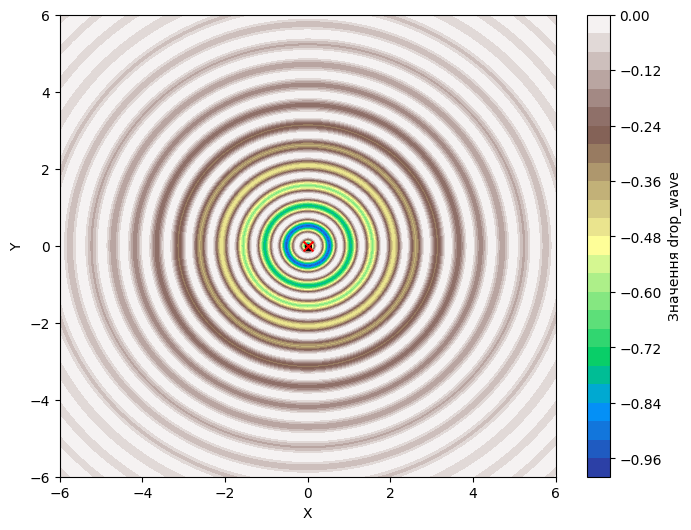

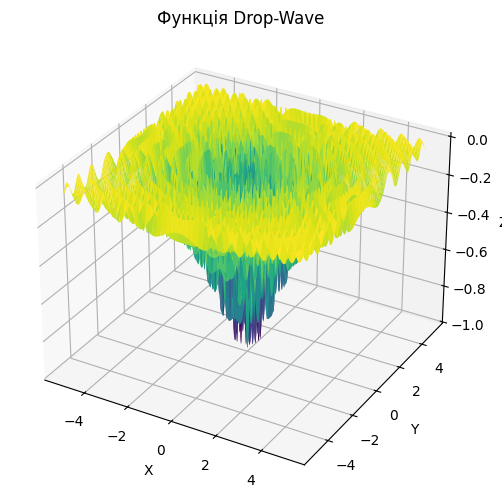

In [26]:
x = np.linspace(-6, 6, 500)  # Діапазон X
y = np.linspace(-6, 6, 500)  # Діапазон Y
X, Y = np.meshgrid(x, y)     # Створюємо координатну сітку
Z = drop_wave(X, Y)               # Обчислюємо значення функції

# Будуємо графік
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=30, cmap='terrain')  # 'terrain' - кольори, схожі на фізичну карту
plt.colorbar(contour, label="Значення drop_wave")  # Додаємо кольорову шкалу
plt.xlabel("X")
plt.ylabel("Y")
for i in test:
    plt.scatter(i[0],i[1], color="black", marker=".", s=50)
plt.scatter(0, 0, color="Red", marker="x", s=50)
# Відображення функцій

plot_function(drop_wave, bounds_drop_wave, "Функція Drop-Wave")

In [36]:
accuracy=0
stability=0
for i in range(0,200):
    print(i)
    test,serv=adaptive_spiral_search("schwefel", bounds_schwefel, pop_size=200)
    dist=euclidean_distance(test[0],min_schwefel)
    accuracy+=dist
    if dist<=50:
        stability+=1
accuracy=accuracy/200
stability=stability/200
print(accuracy)
print(stability)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
139.3065396785108
0.805


In [28]:
test,serv=adaptive_spiral_search("schwefel", bounds_schwefel, pop_size=200)
print(test)
print(serv)
schwefel_test_x=[]
schwefel_test_y=[]
schwefel_test_z=[]
for i in test:
    schwefel_test_x.append(i[0])
    schwefel_test_y.append(i[1])
    schwefel_test_z.append(i[2])
temp_exp={
    "X": schwefel_test_x,
    "Y": schwefel_test_y,
    "Z": schwefel_test_z
}
export_test=pd.DataFrame(temp_exp)
export_test.to_excel("EMO3_output2.xlsx", index=False)

[[429.1735174554552, 431.0843162511711, np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), np.float64(21.388668862802433)], [np.float64(429.1735174554552), np.float64(431.0843162511711), 

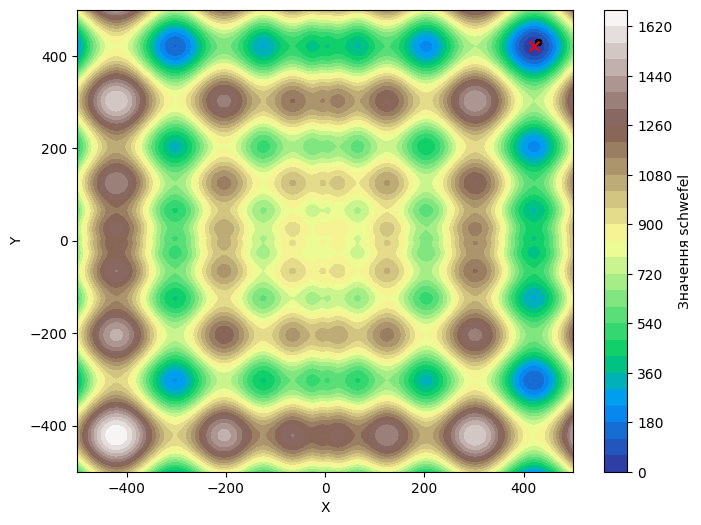

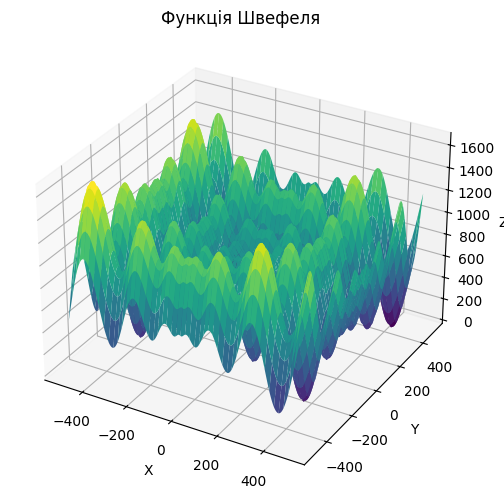

In [29]:
x = np.linspace(-500, 500, 1000)  # Діапазон X
y = np.linspace(-500, 500, 1000)  # Діапазон Y
X, Y = np.meshgrid(x, y)     # Створюємо координатну сітку
Z = schwefel(X, Y)               # Обчислюємо значення функції

# Будуємо графік
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=30, cmap='terrain')  # 'terrain' - кольори, схожі на фізичну карту
plt.colorbar(contour, label="Значення schwefel")  # Додаємо кольорову шкалу
plt.xlabel("X")
plt.ylabel("Y")
for i in test:
    plt.scatter(i[0],i[1], color="black", marker=".", s=50)
plt.scatter(420.9687, 420.9687, color="Red", marker="x", s=50)
plot_function(schwefel, bounds_schwefel, "Функція Швефеля")

In [38]:
functions=["schwefel", "drop_wave"]
theta_s=[np.pi/6, np.pi/3]
rlu_s=[[0.8, 1.1],[0.8,1.3],[0.95,1.1],[0.95,1.3]]
c1_s=[0.1, 1.0, 10.0]

def grid_test():
    temp_counter=[]
    temp_pop=[]
    temp_funcs=[]
    for func in functions:
        for theta_t in theta_s:
            for rlu in rlu_s:
                for c1_t in c1_s:
                    if func=="schwefel":
                        bounds=bounds_schwefel
                    else: 
                        bounds=bounds_drop_wave
                    x, y=adaptive_spiral_search(func, bounds, pop_size=100, r_l=rlu[0], r_u=rlu[1], theta=theta_t, c1=c1_t)
                    temp_pop.append(x)
                    temp_counter.append(y)
                    temp_funcs.append(func)
    return temp_pop, temp_counter, temp_funcs

In [39]:
adapt_stability=[]
adapt_accuracy=[]
adapt_functions=[]
adapt_counter=[]
adapt_rlu=[]
adapt_theta=[]
adapt_c1=[]

for func in functions:
        for theta_t in theta_s:
            for rlu in rlu_s:
                for c1_t in c1_s:
                    adapt_functions.append(func)
                    adapt_theta.append(theta_t)
                    adapt_rlu.append(rlu)
                    adapt_c1.append(c1_t)
                    adapt_stability.append(np.float64(0))
                    adapt_accuracy.append(np.float64(0))
                    adapt_counter.append(np.float64(0))
dict={
    "Target function": adapt_functions,
    "Param_theta": adapt_theta,
    "Param_rl_ru": adapt_rlu,
    "Param_c1":adapt_c1,
    "Stability": adapt_stability,
    "AvgDistance":adapt_accuracy,
    "Function counts": adapt_counter
    }
results_df=pd.DataFrame(dict)
print(results_df)

   Target function  Param_theta  Param_rl_ru  Param_c1  Stability  \
0         schwefel     0.523599   [0.8, 1.1]       0.1        0.0   
1         schwefel     0.523599   [0.8, 1.1]       1.0        0.0   
2         schwefel     0.523599   [0.8, 1.1]      10.0        0.0   
3         schwefel     0.523599   [0.8, 1.3]       0.1        0.0   
4         schwefel     0.523599   [0.8, 1.3]       1.0        0.0   
5         schwefel     0.523599   [0.8, 1.3]      10.0        0.0   
6         schwefel     0.523599  [0.95, 1.1]       0.1        0.0   
7         schwefel     0.523599  [0.95, 1.1]       1.0        0.0   
8         schwefel     0.523599  [0.95, 1.1]      10.0        0.0   
9         schwefel     0.523599  [0.95, 1.3]       0.1        0.0   
10        schwefel     0.523599  [0.95, 1.3]       1.0        0.0   
11        schwefel     0.523599  [0.95, 1.3]      10.0        0.0   
12        schwefel     1.047198   [0.8, 1.1]       0.1        0.0   
13        schwefel     1.047198   

In [52]:
dist=0
for i in range(100):
    pop,count,funcs =grid_test()
    print(i)
    for j in range(len(pop)):
        if funcs[j]=="schwefel":
            dist=euclidean_distance(pop[j][0],min_schwefel)
            #print(dist)
            if dist<=55:
                results_df.at[j,'Stability']+=1
                #print("a")
            results_df.at[j,'AvgDistance']=results_df.at[j,'AvgDistance']+dist
            results_df.at[j,'Function counts']=count[j]
            #print("b")
        if funcs[j]=="drop_wave":
            dist=euclidean_distance(pop[j][0],min_drop_wave)
            if dist<=0.6:
                results_df.at[j,'Stability']+=1
                #print("c")
            results_df.at[j,'AvgDistance']=results_df.at[j,'AvgDistance']+dist
            results_df.at[j,'Function counts']=count[j]
            #print("d")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [53]:
for i in range(48):
    results_df.at[i,"AvgDistance"]=results_df.at[i,"AvgDistance"]/100
    results_df.at[i,"Stability"]=results_df.at[i,"Stability"]/100

In [54]:
print(results_df)

   Target function  Param_theta  Param_rl_ru  Param_c1  Stability  \
0         schwefel     0.523599   [0.8, 1.1]       0.1   0.473920   
1         schwefel     0.523599   [0.8, 1.1]       1.0   0.484322   
2         schwefel     0.523599   [0.8, 1.1]      10.0   0.464916   
3         schwefel     0.523599   [0.8, 1.3]       0.1   0.474124   
4         schwefel     0.523599   [0.8, 1.3]       1.0   0.484521   
5         schwefel     0.523599   [0.8, 1.3]      10.0   0.415107   
6         schwefel     0.523599  [0.95, 1.1]       0.1   0.606618   
7         schwefel     0.523599  [0.95, 1.1]       1.0   0.676321   
8         schwefel     0.523599  [0.95, 1.1]      10.0   0.586119   
9         schwefel     0.523599  [0.95, 1.3]       0.1   0.525823   
10        schwefel     0.523599  [0.95, 1.3]       1.0   0.646220   
11        schwefel     0.523599  [0.95, 1.3]      10.0   0.636210   
12        schwefel     1.047198   [0.8, 1.1]       0.1   0.415543   
13        schwefel     1.047198   

In [ ]:
results_df.to_excel("EMO3_rezal.xlsx", index=False)

: 